#**Synapse Week Two**

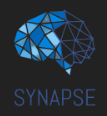

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

https://www.geeksforgeeks.org/ml-classification-vs-regression/
(Short and Sweet)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [307]:
 !pip install shap -q  #Will be used later on

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Regression

For regression we will use the car sales dataset - https://drive.google.com/file/d/1dtwer8INIz05mULkV5yk8-Fzk2r3K1Of/view?usp=sharing

#### Basic EDA

Import dataset

In [310]:
df=pd.read_csv('/content/drive/MyDrive/Car_details.csv')

##### Do .head, .info and .describe in the subsequent cells

In [311]:
df.drop('torque',axis=1,inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [313]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


##### Plot a bar chart for the year, fuel and transmission columns

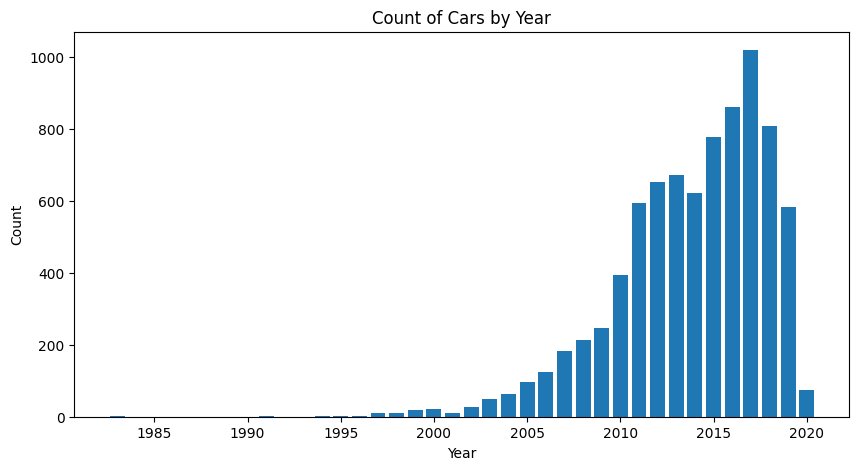

In [314]:
group_data1=df.groupby('year').size().reset_index(name='count') #grouping data acc to number of cars every year
plt.figure(figsize=(10,5))
plt.bar(group_data1['year'],group_data1['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Cars by Year')
plt.show()


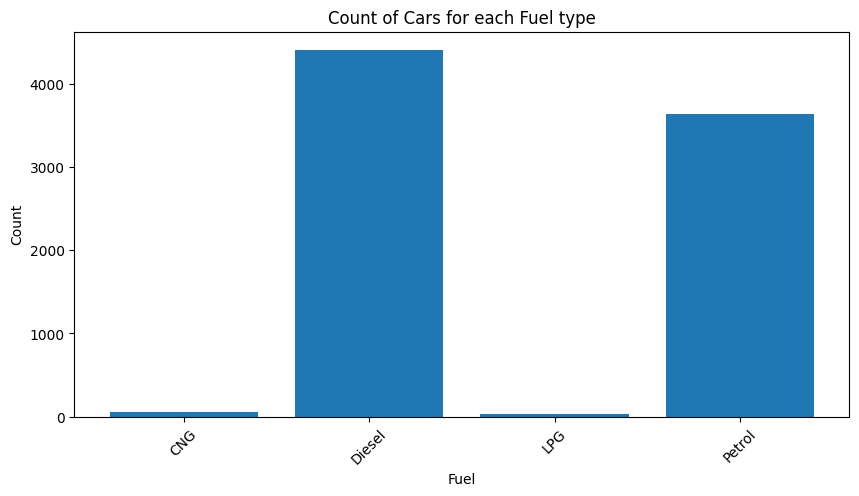

In [315]:
group_data2=df.groupby('fuel').size().reset_index(name='count') #grouping data acc to number of cars for each fuel
plt.figure(figsize=(10,5))
plt.bar(group_data2['fuel'],group_data2['count'])
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Count of Cars for each Fuel type')
plt.show()


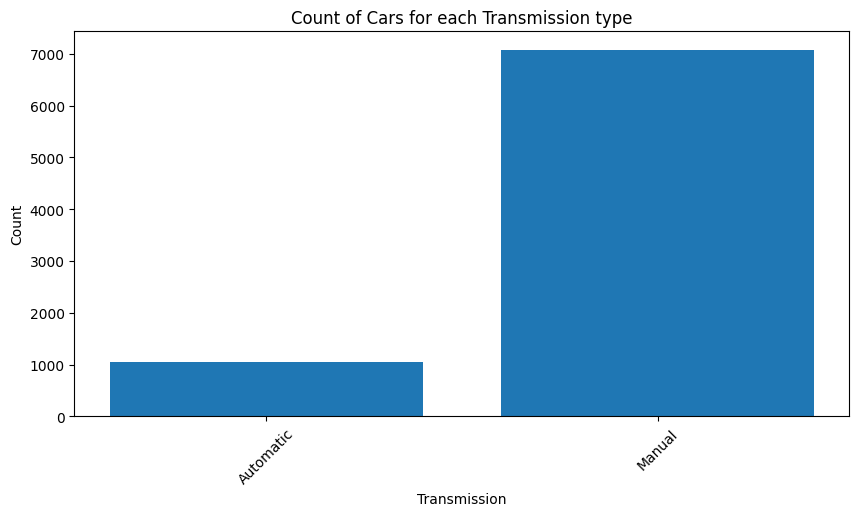

In [316]:
group_data3=df.groupby('transmission').size().reset_index(name='count') #grouping data acc to number of cars for each transmission type
plt.figure(figsize=(10,5))
plt.bar(group_data3['transmission'],group_data3['count'])
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Count of Cars for each Transmission type')
plt.show()


##### Plot a pie chart for the owner and seats column

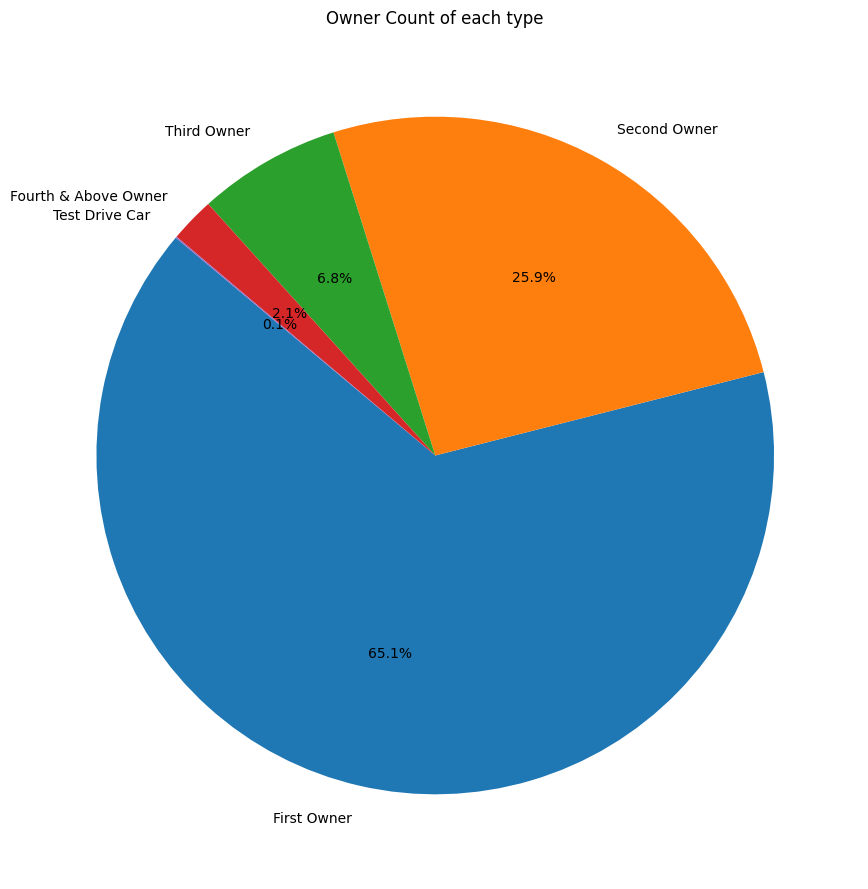

In [317]:
owner_count=df['owner'].value_counts()    #counting the no of occurences of each unique value of owner type
plt.figure(figsize=(11,11))
plt.pie(owner_count,labels=owner_count.index,autopct='%1.1f%%',startangle=140)    #.index giving the index of the owner_count series for plotting
plt.title('Owner Count of each type')
plt.show()

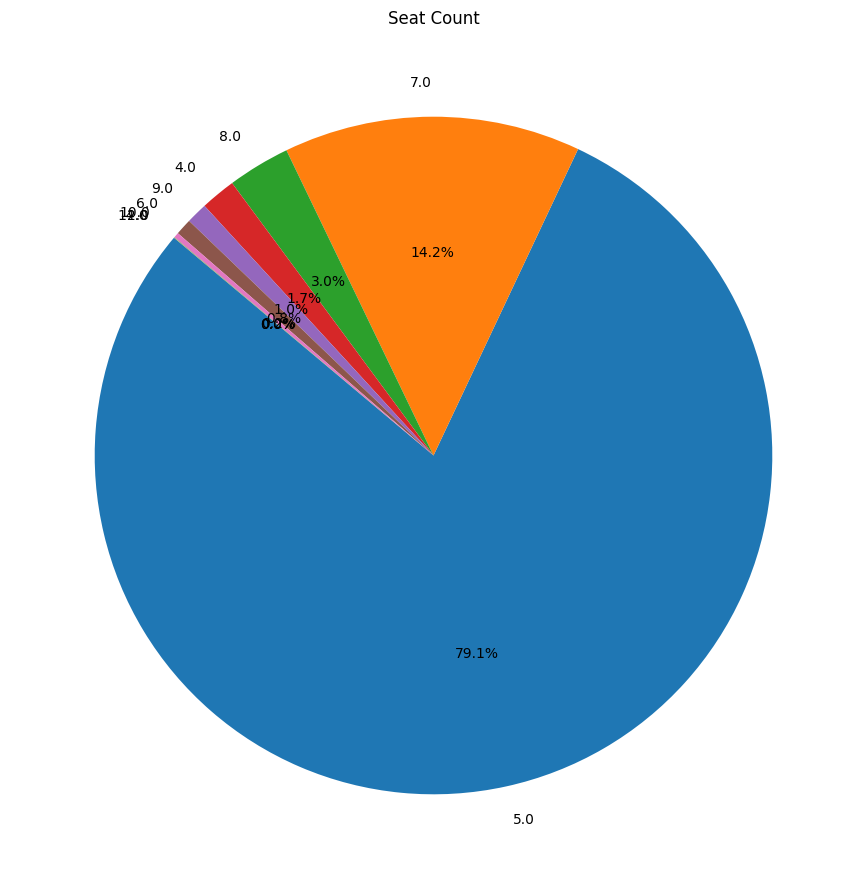

In [318]:
seat_count=df['seats'].value_counts()        #counting the no of occurences of each unique value of no of seats
plt.figure(figsize=(11,11))
plt.pie(seat_count,labels=seat_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Seat Count')
plt.show()

##### Make a KDE plot to represent the engine column

##### Since the engine column is of type object you'll need to convert it to float and round it to the nearest 10 place as it would be easier to count and plot


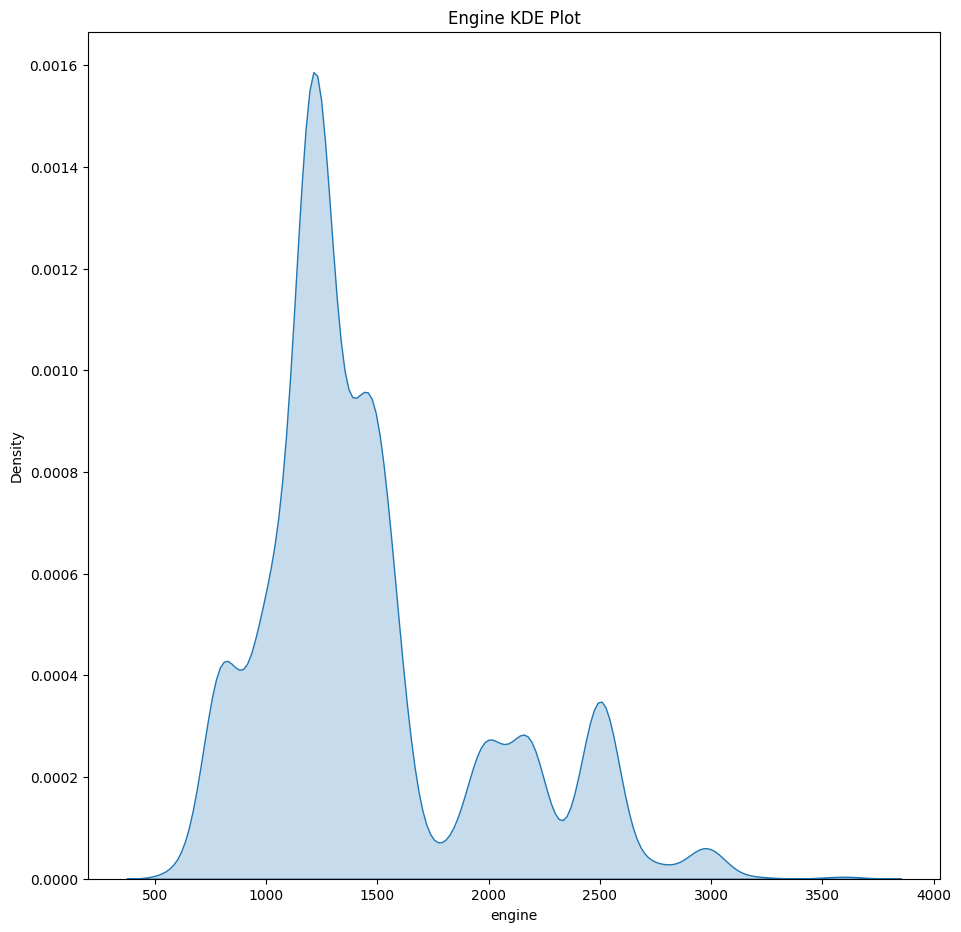

In [319]:
# code here
df['engine']=df['engine'].str.replace('cc',' ')     #replacing the cc (actual and only string part) to empty string
df['engine']=df['engine'].str.replace('CC',' ')     #also replacing the CC with empty string
df['engine']=df['engine'].str.strip()              #removing the spaces
df['engine']=df['engine'].astype('float')           #converting to float
df['engine']=df['engine'].round(10)                 #rounding

#also for extra accuracy dropping na values from engine column if any
df=df.dropna(subset=['engine']).reset_index()
#now the kde plotting
plt.figure(figsize=(11,11))
sns.kdeplot(df['engine'],fill=True)
plt.title('Engine KDE Plot')
plt.show()
# code ends

Plot the graph

##### Also make a countplot for the Engine column
hint: sns.countplot

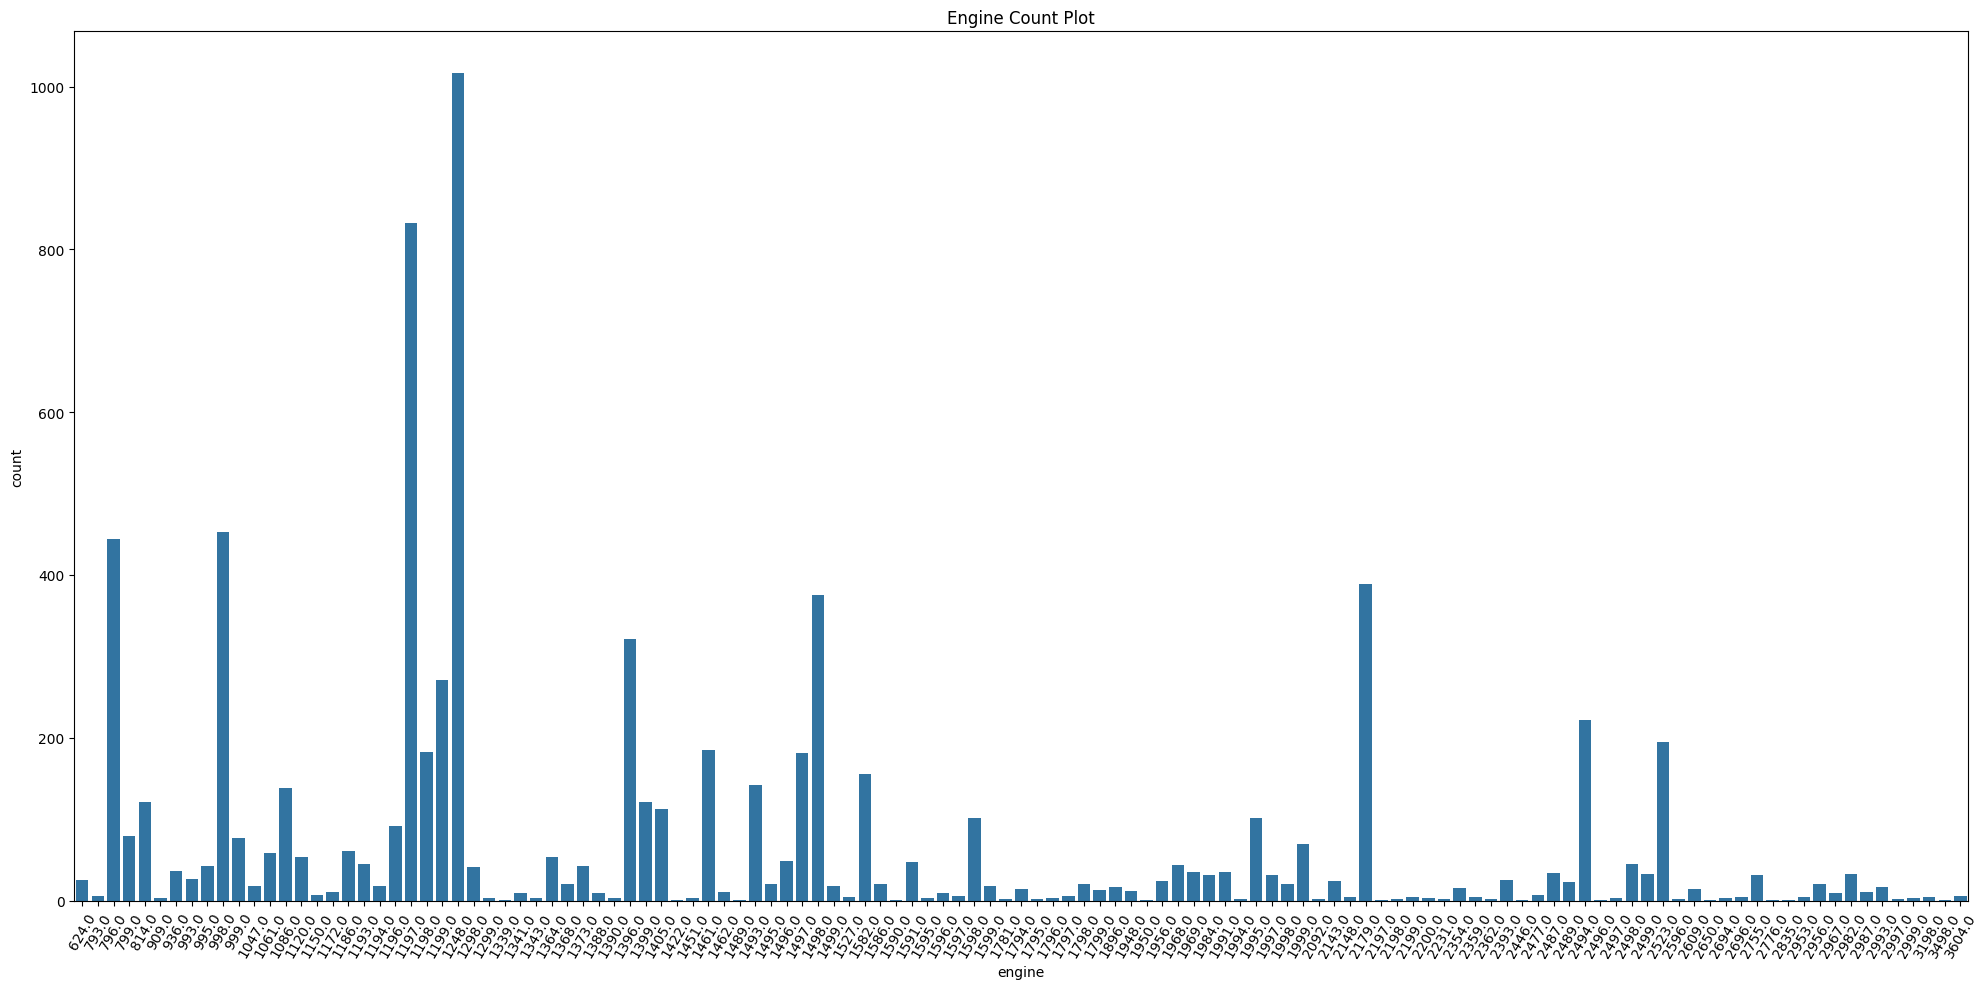

In [320]:
#plot here
plt.figure(figsize=(20,10))
sns.countplot(x='engine',data=df)
plt.xticks(rotation=60)
plt.title("Engine Count Plot")
plt.tight_layout()
plt.show()

##### As you can see in the Name column the entire name of the car is given, it will be very difficut to perfrom EDA and feed in this column into our Regression model so we will just extract the car manufacturer's name and create a new column Brand

In [321]:
# code here
#as given in dataset the first part of car name is the brand name
#so splitting it and making a new column of those value will give us the 'Brand' column

df['brand+name']=df['name'].str.split(' ',n=1)
# creating a column with both brand and car name separate string in one column
#' ' is the seperator/delimiter for our case,
#1 will limit no of splits to 1

df['brand'] = df['brand+name'].str[0]
#taking just the brand from above column
#str[0] will give the first string after the split action

df.drop('brand+name',axis=1,inplace=True)
df.drop('index',axis=1,inplace=True)
#dropping the extra column made

df.head()
# code ends

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74 bhp,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52 bhp,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78 bhp,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90 bhp,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.2 bhp,5.0,Maruti


##### Plot a bar graph for the new column brand

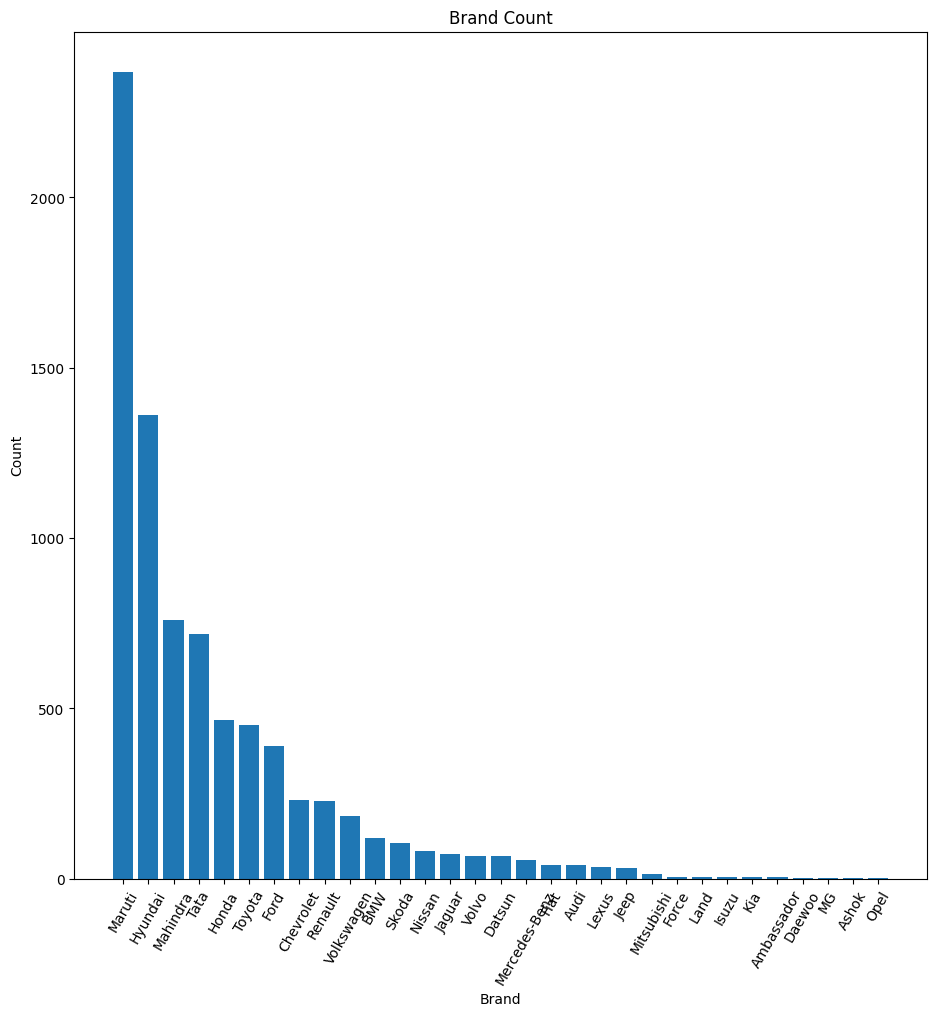

In [322]:
#plot here
plt.figure(figsize=(11,11))
plt.bar(df['brand'].value_counts().index, df['brand'].value_counts())
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.title("Brand Count")
plt.show()

#### Perform a simiar process as Engine column for the Mileage column, extract the mileage number convert it to float and round it to the nearest 1's place

In [323]:
# code here
#first converting kmpl to empty string
df['mileage']=df['mileage'].str.replace('kmpl',' ')
df['mileage']=df['mileage'].str.replace('km/kg',' ')
#removing extra spaces
df['mileage']=df['mileage'].str.strip()
#converting to float
df['mileage']=df['mileage'].astype(float)
#rounding
df['mileage']=df['mileage'].round(1)
#replacing na values with 0.0
df['mileage']=df['mileage'].fillna(0.0)

df.head()
# code ends

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74 bhp,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52 bhp,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78 bhp,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90 bhp,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2 bhp,5.0,Maruti


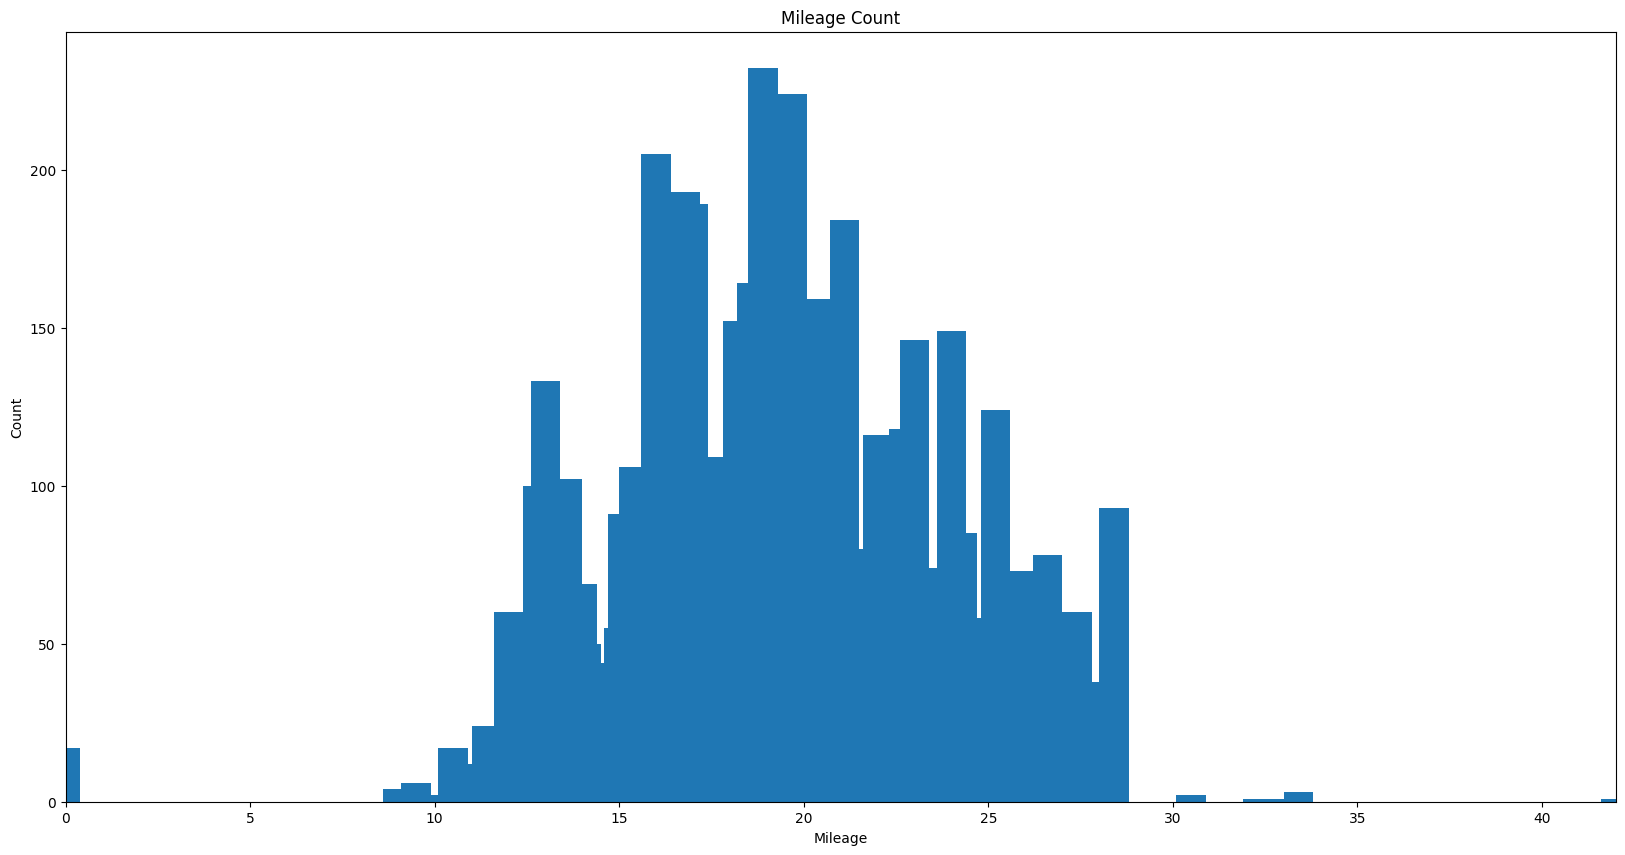

In [324]:
#plot the count of each mileage value
#this will be similar to brand count plot
plt.figure(figsize=(20,10))
plt.bar(df['mileage'].value_counts().index, df['mileage'].value_counts())
plt.xlim(df['mileage'].min(),df['mileage'].max())
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.title("Mileage Count")
plt.show()
# code here

#### If you want to do more analysis and make some graphs you are more than welcome :)

## What do you infer from the above analysis

### Answer Here

From the above analysis, we found many relations, number of occurences as per several columns, and also manipulating the data as per my need. Basically this was just basic eda process and some very very preliminary analysis and refining of data part.

### Now let's prep our data to perform Regression to predict the Selling Price

##### As you can see the column max_power is of type object, we need to extract the max_power similar to Engine and Mileage columns

Be careful of NaN values in this part of the code, perform df.info() to look how many Nan value are present, you might face diffculties when you are trying to convert object to float in Nan values are present

In [325]:
# code here
#fixing the nan value part by replacing it with 0.0 bhp
df['max_power']=df['max_power'].str.replace('bhp',' ')
df['max_power']=df['max_power'].str.replace('',' ')
df['max_power']=df['max_power'].str.replace(r'\s+','',regex=True)     #remove middle spaces in terms of regular expression only
df['max_power']=df['max_power'].str.strip()
df['max_power']=df['max_power'].fillna('0.0')
df['max_power']=pd.to_numeric(df['max_power'])
df['max_power']=df['max_power'].round(1)
df.head(15)
#code ends

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.5,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.0,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0,Maruti
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.1,1197.0,81.9,5.0,Hyundai
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061.0,57.5,5.0,Maruti
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.0,4.0,Maruti
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.6,1364.0,67.1,5.0,Toyota
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0,1399.0,68.1,5.0,Ford


In [24]:
# code ends

##### The year column contains the year the car was manufactured, but this data won't be directly useful to us
##### Use the current year to calculate the age of the car

In [326]:
# code here
#getting datetime module
from datetime import datetime
#getting current year
current_year=datetime.now().year

df['age']=current_year-df['year']

# drop the columns year and name
df.drop(['year','name'],axis=1,inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,10
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.5,5.0,Skoda,10
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.0,5.0,Honda,18
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0,Hyundai,14
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0,Maruti,17


##### A few of the columns are still of dtype object, now we will be using Laber Encoder to encode these columns

##### Import LaberEncoder from sklearn

In [327]:
# import here
from sklearn.preprocessing import LabelEncoder
# now label encode the columns = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
# code here
for i in df.select_dtypes(include=['object']).columns:
  df[i]=LabelEncoder().fit_transform(df[i])
# code ends

Do df.head() to see how your dataframe looks like after LabelEncoding

In [328]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
0,450000,145500,1,1,1,0,23.4,1248.0,74.0,5.0,20,10
1,370000,120000,1,1,1,2,21.1,1498.0,103.5,5.0,26,10
2,158000,140000,3,1,1,4,17.7,1497.0,78.0,5.0,10,18
3,225000,127000,1,1,1,0,23.0,1396.0,90.0,5.0,11,14
4,130000,120000,3,1,1,0,16.1,1298.0,88.2,5.0,20,17


##### The reason behind standardization and normalization will be explained in the later part of the task

##### For now we need to Normalize somem specific coloums
##### Import MinMaxScaler from sklearn and normalize the coloums - ['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'age', 'selling_price']

In [329]:
# import here
from sklearn.preprocessing import MinMaxScaler

# code here
for j in ['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'age', 'selling_price']:
  df[j]=MinMaxScaler().fit_transform(df[j].values.reshape(-1,1))
df.head()
#code ends

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
0,0.042126,0.061640,1,1,1,0,0.557143,0.209396,0.112200,0.25,20,0.230769
1,0.034102,0.050837,1,1,1,2,0.502381,0.293289,0.192538,0.25,26,0.230769
2,0.012839,0.059310,3,1,1,4,0.421429,0.292953,0.123094,0.25,10,0.538462
3,0.019559,0.053803,1,1,1,0,0.547619,0.259060,0.155773,0.25,11,0.384615
4,0.010030,0.050837,3,1,1,0,0.383333,0.226174,0.150871,0.25,20,0.500000


In [330]:
# Fill NaN values in the dataset
df.fillna(df.mean(),inplace=True)


In [331]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
0,0.042126,0.061640,1,1,1,0,0.557143,0.209396,0.112200,0.25,20,0.230769
1,0.034102,0.050837,1,1,1,2,0.502381,0.293289,0.192538,0.25,26,0.230769
2,0.012839,0.059310,3,1,1,4,0.421429,0.292953,0.123094,0.25,10,0.538462
3,0.019559,0.053803,1,1,1,0,0.547619,0.259060,0.155773,0.25,11,0.384615
4,0.010030,0.050837,3,1,1,0,0.383333,0.226174,0.150871,0.25,20,0.500000


As mentioned above, the 'selling_price' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'selling_price') and one which only contains the column 'selling_price'. Name them X and y respectively.

In [332]:
# Seperate the Dataframe into X and y
x=df.drop('selling_price',axis=1)
y=df['selling_price']
print(x.head())
print(y.head())

   km_driven  fuel  seller_type  transmission  owner   mileage    engine  \
0   0.061640     1            1             1      0  0.557143  0.209396   
1   0.050837     1            1             1      2  0.502381  0.293289   
2   0.059310     3            1             1      4  0.421429  0.292953   
3   0.053803     1            1             1      0  0.547619  0.259060   
4   0.050837     3            1             1      0  0.383333  0.226174   

   max_power  seats  brand       age  
0   0.112200   0.25     20  0.230769  
1   0.192538   0.25     26  0.230769  
2   0.123094   0.25     10  0.538462  
3   0.155773   0.25     11  0.384615  
4   0.150871   0.25     20  0.500000  
0    0.042126
1    0.034102
2    0.012839
3    0.019559
4    0.010030
Name: selling_price, dtype: float64


### Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [333]:
# import here
from sklearn.model_selection import train_test_split

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [334]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

(5534, 11)
(2373, 11)
(5534,)
(2373,)
2.144637530755962
2.157906975049512
0.06275237801819518
0.060781004740588215


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

### We have preprocessed our DataFrame now we'll perform Regression on this Data

### First lets understand Linear Regression, watch this video carefully it will be helpfull later on :)

https://www.youtube.com/watch?v=7ArmBVF2dCs

### A quick article
https://www.analyticsvidhya.com/blog/2021/08/understanding-linear-regression-with-mathematical-insights/

In [221]:
# perfrom linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# create an instance of LinearRegression
regressor=LinearRegression()

In [222]:
# fit the model on the training data, hint: use the fit method
regressor.fit(x_train,y_train)

LinearRegression()

#### The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

#### Use regressor.predict() on X_test and store it in a variable called "y_pred". Print type and size of the y_pred.

#### Size should be (22009,) if everything is correct. Yeh line confirm karna hai

In [223]:
# make predictions on the test data
y_pred = regressor.predict(x_test)
print(y_pred.shape)



(2373,)


In [224]:
# calculate the mean squared error
mse = mean_squared_error(y_test,y_pred)
mse

0.0018613253852196774

### Visualize the predictions, plot a scatter plot of y_test vs y_pred and also plot the best fit line

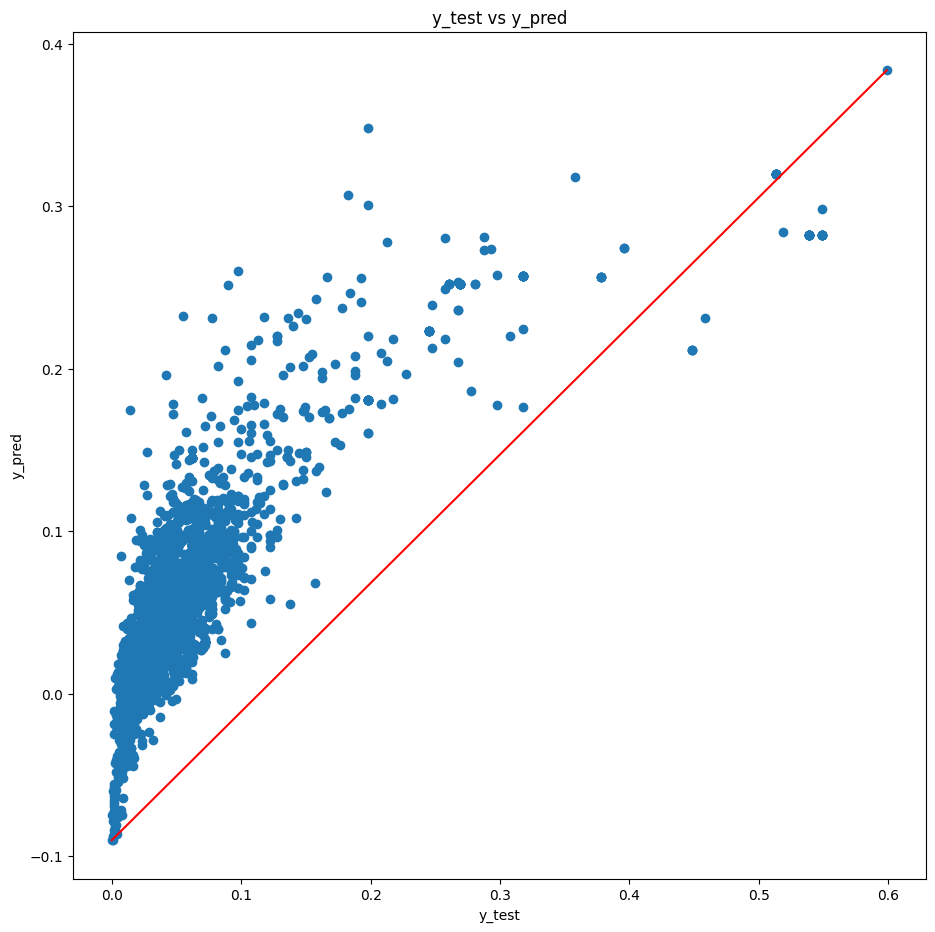

In [225]:
#plot here
plt.figure(figsize=(11,11))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()

# Now let's start the fun part :)

### Have you ever wondered what happens when you call **'regressor.fit(X_train, y_train)'** ?

### To understand what's hapenning in .fit method we will be implementing Linear Regression from scratch.

In [226]:
class LinearRegression() :

    def __init__( self, learning_rate, iterations ) :
        # initialize the learning rate and iterations provides by the user
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # what does self.m and self.n represent and why are they calculated?

        # weight initialization
        self.W = np.zeros(self.n)

        self.b = 0# set this equal to 0

        self.X =  X# set this equal to X

        self.Y = Y# set this equal to Y


        # gradient descent learning
        for i in range(self.iterations) : # complete the range function

            self.update_weights()

        return self

    # Helper function to update weights in gradient descent
    def update_weights(self) :

        Y_pred = self.predict(self.X)
        # complete this line

        # calculate gradients
        dW = - ( 2 /self.m)* ( self.X.T ).dot( self.Y - Y_pred )  # complete this line
        db = - ( 2 /self.m)* np.sum( self.Y - Y_pred )

        # write the code to update the weights
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        return self


    def predict(self,X) :

        return X.dot(self.W)+self.b

model = LinearRegression( iterations = 10000, learning_rate = 0.0001 )

model.fit(x_train,y_train)

#### Answer Here

In [227]:
y_pred = model.predict(x_test)
y_pred

,0
325,0.047312
4498,0.057616
7756,0.081885
5070,0.032741
2379,0.035020
...,...
6387,0.050201
6454,0.030346
3249,0.050914
2706,0.052963


In [228]:
# Calculate the mean squared error
mse=mean_squared_error(y_test,y_pred)
mse

0.005192987923660391

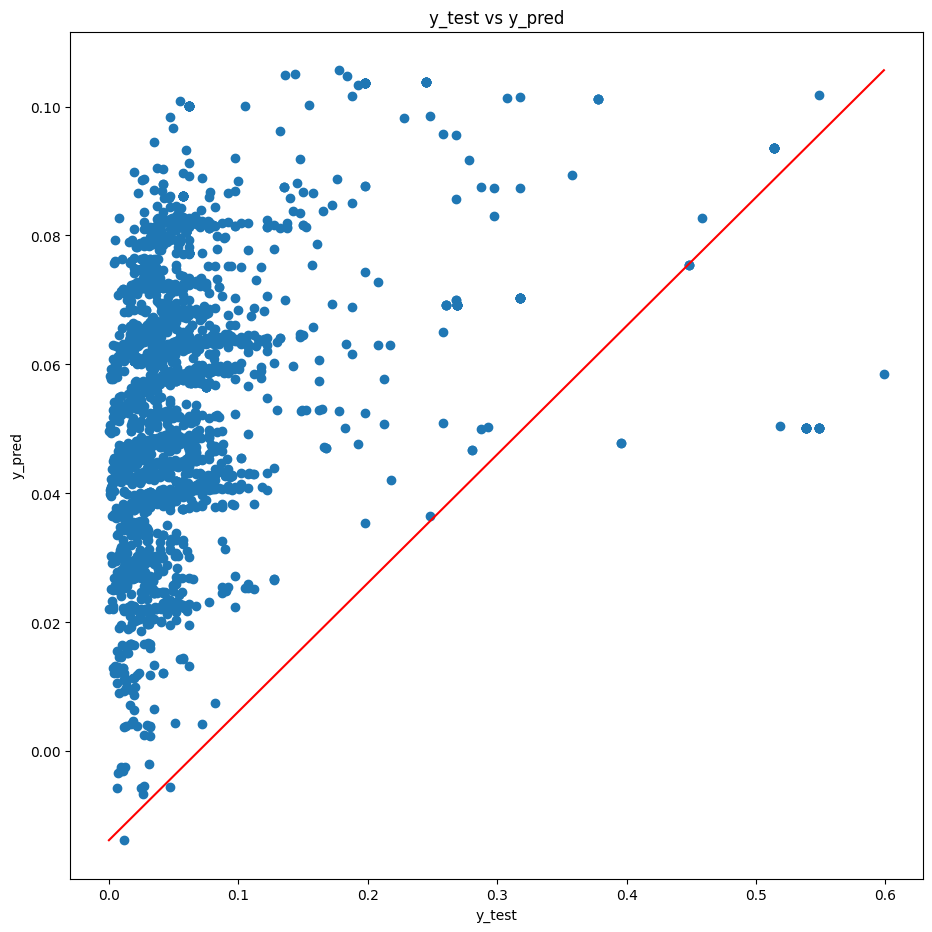

In [229]:
# plot a similar scatter plot as above
plt.figure(figsize=(11,11))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()

## Classification

#### In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [290]:
df1 = pd.read_csv('/content/drive/MyDrive/classified_data.txt',index_col=0)
df1.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

#### Basic EDA

##### In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [291]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [293]:
df1.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
##### Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
##### Refer seaborn boxplot() documentation

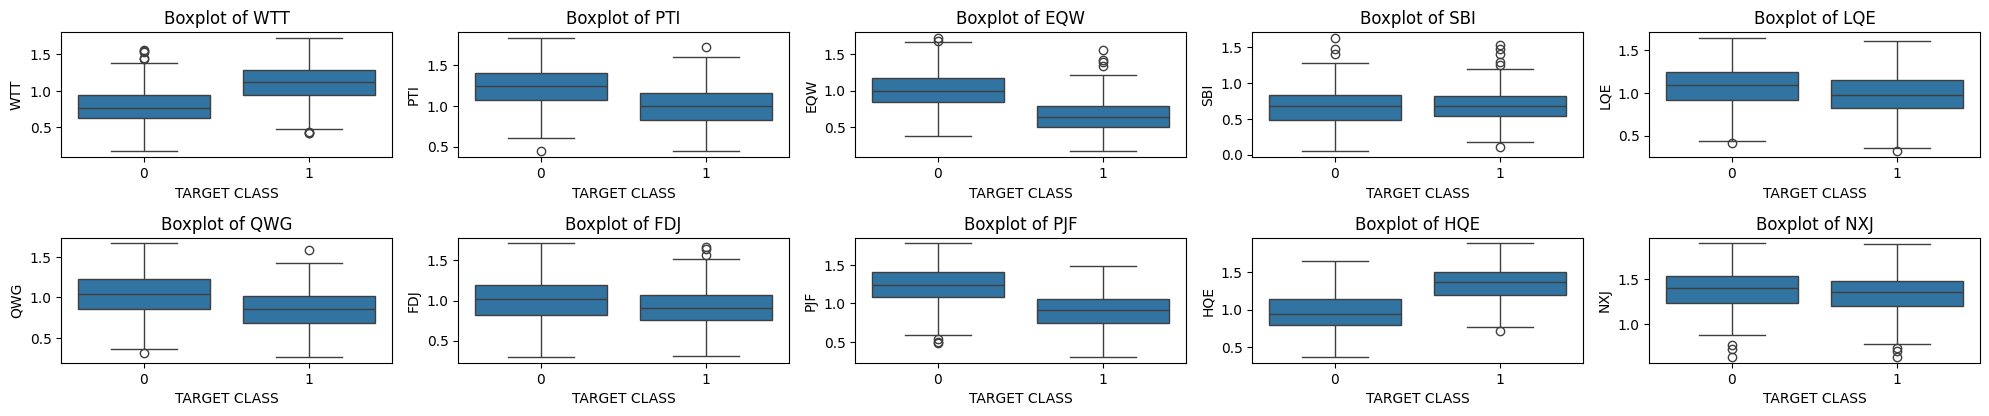

In [294]:
#plot
target='TARGET CLASS'
others=df1.drop(columns=[target]).columns
plt.figure(figsize=(20,10))

#getting each column + index in csv except target class
for i,other in enumerate(others):
  plt.subplot(5,5,i+1)
  sns.boxplot(x=target, y=other, data=df1)
  plt.title(f"Boxplot of {other}")
  plt.xlabel(target)
  plt.ylabel(other)
plt.tight_layout()
plt.show()


##### What conclusion, if any can you draw from these boxplots?
List them down below.

Conclusions
1. The median of 0 & 1 in WTT, PTI, EQW, PJF, HQE have quite a visible difference. this shows that these columns have a strong relation with TARGET column. They can be more useful in model building.
2. the boxplot of SBI shows a wide spread. this may mean a wider range of variability in values
3. boxplot of NXJ wont really be useful in showing a relation with TARGET as its plot for both 0 & 1 is quite identical

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

##### **import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [295]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# your code ends here

##### **Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
##### Hint: scaler.fit() and scaler.transform()

In [296]:
# your code starts here
df_feature =scaler.fit(df1[others])
df_feature =scaler.transform(df1[others])
# your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [297]:
# your code starts here
df_feat =pd.DataFrame(df_feature,columns=others)
df_feat.head()
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [298]:
x,y = df_feat.values[:,:],df.values[:,-1]
y

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [299]:
# Your code starts here.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [300]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [301]:
# Your code starts here.
pred=knn.predict(x_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [302]:
# Your code starts here.
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
# Your code ends here

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       142
         1.0       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



#### Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [303]:
# Your code starts here.
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,pred)
print(round(acc_score,3))

# Your code ends here

0.937


##### Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [304]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# Your code starts here.
accuracy_lst = {}
for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  accuracy_lst[i]= accuracy_score(y_test,pred_i)
  i=i+1
# Your code ends here

##### **Plot a graph of K value vs Accuracy**

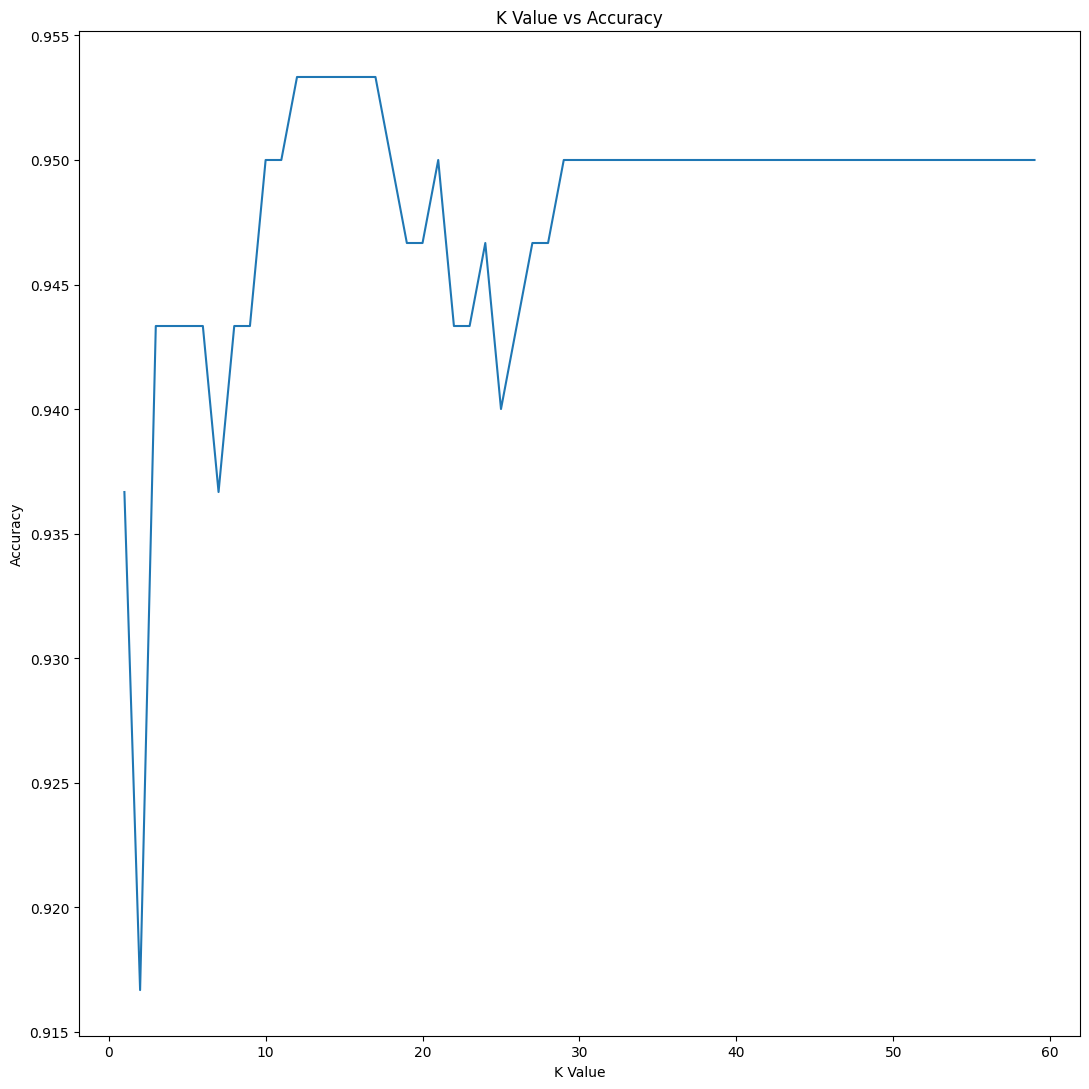

In [305]:
# Your code starts here.
plt.figure(figsize=(11,11))
plt.plot(accuracy_lst.keys(),accuracy_lst.values())
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs Accuracy')
plt.tight_layout()
plt.show()
# Your code ends here

##### **Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [306]:
# Your code starts here.
n_acc_best = max(accuracy_lst.values())
n_neigh_best = max(accuracy_lst, key=accuracy_lst.get)
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 12
Corresponding highest accuracy: 0.9533333333333334


### OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [355]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

In [356]:
import shap

In [357]:
X_test = pd.DataFrame(x_test)
X_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [363]:
#Run this code as it is
ex = KernelExplainer(regressor.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

NotImplementedError: matplotlib = True is not yet supported for force plots with multiple samples!

##### Plotting the same information in a different way

In [353]:
explainer_ebm = shap.Explainer(regressor.predict,sample(X_train, 10))
shap_values_ebm = explainer_ebm(X_train)

PermutationExplainer explainer: 5535it [04:35, 19.78it/s]                          


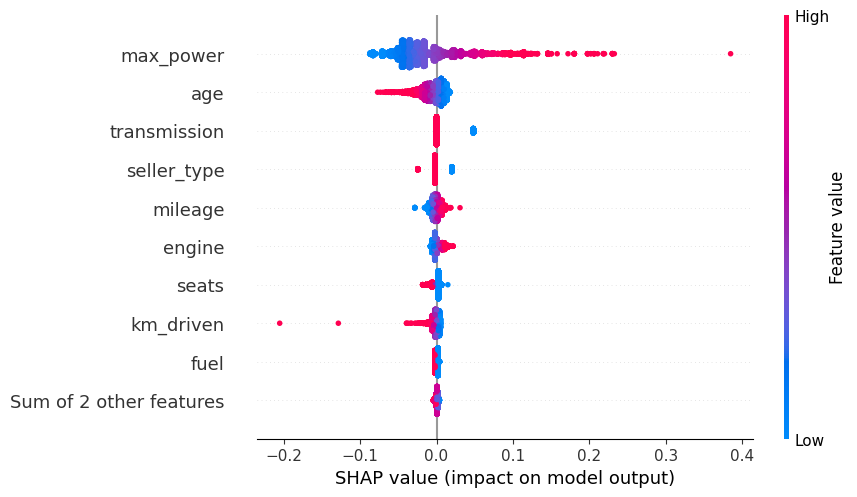

In [354]:
shap.plots.beeswarm(shap_values_ebm)

#### Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

RESEARCH TASK:


A)Logistic Regression

https://ryxcommar.com/2020/06/27/why-do-so-many-practicing-data-scientists-not-understand-logistic-regression/

B) Read the above article and write you understand


What is a logit, probit?

KEY POINTS FROM ARTICLE
1. Logistic regression is a model for estimating probabilities and for classifying observations. It's often misunderstood as a "classification algorithm" because it deals with binary outcomes. It calculates probabilities of outcomes, and classification is simply an indirect application where you apply a rule to the probability output.
2. The logit function is the inverse of the logistic function and logistic regression is described more accurately in terms of the logit function.
3. Many data scientists learn logistic regression as a classification algorithm without realizing that the model outputs probabilities, when classification is rather an extra step.
4. Rebalancing may marginally improve model performance but it is not a universal solution and can be a distraction from the real modeling issues.



What is a logit, probit?
Logit and probit are both types of models used to estimate the probability of a binary outcome.

1. The logit model is based on the logistic function, which models the probability of an event occurring. The logistic function, or the sigmoid function, maps any real-valued number to a value between 0 and 1. This is useful because probabilities must fall within this range.

2. The probit model is another type of regression used for modeling binary outcome variables. But, instead of using the logistic function, the probit model uses the cumulative distribution function (CDF) of the standard normal distribution to estimate the probability.

3. Logit is generally easier to compute compared to Probit as Probit requires numerical integration for the CDF part.



C) Difference between logistic regression and classification

1. LOGISTIC REGRESSION

a. Definition - A model to predict probability of a binary outcome

b. Output - Probability between 0 & 1

c. Statistical methods (standard for Logit, CDF for Probit) used to get the output

d. Provides coefficients that can be interpreted in terms of log-odds.

2. CLASSIFICATION

a. Definition - It is the task of assigning an input to one of several predefined categories or classes.

b. Output - Depends on how many classes are there. For binary classification it'll be either 1 or 0, for multiclass it can be any one of them

c. It uses many types of algorithms, like, logical regression(yes it's a part of classification), decision trees, k-Nearest Neighbor, etc.

d. Interpretation is truly dependant on the algorithm chosen like decision trees can be more interpretable than say, neural networks.



Remark - While logistic regression is frequently taught as a classification tool, its true nature is a probability estimator.

End of Task

©DJS Synapse 2024 - 2025